In [1]:
import pandas as pd 
import yfinance as yf 


In [48]:
ibov=yf.download('^GSPC',start='2015-01-01',end='2024-12-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [49]:
ibov

Ticker,^GSPC
Date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2024-11-22,5969.339844
2024-11-25,5987.370117
2024-11-26,6021.629883


In [161]:
import ipeadatapy as ipea
# Dados de valores nominais: salário mínimo vigente (R$, Ipeadata)
dados_nominais = (
  ipea.timeseries("MTE12_SALMIN12")
  .rename_axis("data", axis = "index")
  .rename(columns = {"VALUE (R$)": "nominal"})
  .filter(items = ["nominal"], axis = "columns")
  .query("data >= '2000-01-01'")
)

In [145]:
dados_indice = (
  pd.read_json(
    path_or_buf = "https://apisidra.ibge.gov.br/values/t/1736/n1/all/v/2289/p/all/d/v2289%2013?formato=json"
    )
  .rename(columns = {"V": "indice", "D3C": "data"})
  .query("indice != 'Valor'")
  .filter(items = ["data", "indice"])
  .assign(
    data = lambda x: pd.to_datetime(x.data, format = "%Y%m"),
    indice = lambda x: x.indice.astype(float)
    )
  .set_index("data")
)
dados_indice

,indice
data,
1979-03-01,5.576500e-09
1979-04-01,5.768900e-09
1979-05-01,5.870400e-09
1979-06-01,6.046500e-09
1979-07-01,6.370500e-09
...,...
2024-07-01,7.159570e+03
2024-08-01,7.149550e+03
2024-09-01,7.183870e+03


In [150]:
testando =pd.read_json(path_or_buf = "https://apisidra.ibge.gov.br/values/t/7060/n1/all/v/2265/p/all/c315/7169/d/v2265%202").dropna()
    

In [ ]:
testando=testando.rename(columns = {"V": "indice", "D3C": "data"}).query("indice != 'Valor'").filter(items = ["data", "indice"])
testando=testando.query('data > "202012"').filter(items = ["data", "indice"]).assign(data = lambda x: pd.to_datetime(x.data, format = "%Y%m"),indice = lambda x: x.indice.astype(float)).set_index("data")
testando


,indice
data,
2021-01-01,4.56
2021-02-01,5.20
2021-03-01,6.10
2021-04-01,6.76
2021-05-01,8.06
2021-06-01,8.35
2021-07-01,8.99
2021-08-01,9.68
2021-09-01,10.25


In [165]:
# Cruzar tabelas
tabela = testando.join(other = dados_nominais, how = "inner")
# Deflacionar a série com data base = último mês observado
indice_data_base = tabela.query("data == data.max()").indice.values -1
tabela.assign(real = lambda x: (indice_data_base / x.indice ) * x.nominal).tail()

,indice,nominal,real
data,,,
2024-07-01,4.50,1412.0,1214.320000
2024-08-01,4.24,1412.0,1288.783019
2024-09-01,4.42,1412.0,1236.298643
2024-10-01,4.76,1412.0,1147.991597
2024-11-01,4.87,1412.0,1122.061602


In [132]:
df_IPCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NC      60 non-null     object
 1   NN      60 non-null     object
 2   MC      60 non-null     object
 3   MN      60 non-null     object
 4   V       60 non-null     object
 5   D1C     60 non-null     object
 6   D1N     60 non-null     object
 7   D2C     60 non-null     object
 8   D2N     60 non-null     object
 9   D3C     60 non-null     object
 10  D3N     60 non-null     object
 11  D4C     60 non-null     object
 12  D4N     60 non-null     object
dtypes: object(13)
memory usage: 6.2+ KB


In [131]:
df_ipca=df_IPCA.rename(columns = {"V": "indice", "D3C": "data"}).query("indice != 'Valor'").filter(items = ["data", "indice"])\
  .assign(
    data = lambda x: pd.to_datetime(x.data, format = "%Y%m"),
    indice = lambda x: x.indice.astype(float)  # convert indice column to float
    )\
  .set_index("data")


ValueError: could not convert string to float: '...'

In [124]:
import pandas as pd

# Supondo que df_ipca seja seu DataFrame

# Inspecionar os valores únicos
print(df_ipca['indice'].unique())

# Remover espaços e converter para float (assumindo que o separador decimal é ponto)
df_ipca['indice'] = df_ipca['indice'].str.replace(' ', '').astype(float)

# Ou, se o separador decimal for vírgula:
# df_ipca['indice'] = df_ipca['indice'].str.replace(',', '.').astype(float)

# Tratar valores ausentes (por exemplo, substituindo por zero)
df_ipca['indice'] = df_ipca['indice'].fillna(0)

[ 0.21  0.25  0.07 -0.31 -0.38  0.26  0.36  0.24  0.64  0.86  0.89  1.35
  0.93  0.31  0.83  0.53  0.96  0.87  1.16  1.25  0.95  0.73  0.54  1.01
  1.62  1.06  0.47  0.67 -0.68 -0.36 -0.29  0.59  0.41  0.62  0.84  0.71
  0.61  0.23 -0.08  0.12  0.28  0.56  0.42  0.16  0.38  0.46 -0.02  0.44
  0.39]


AttributeError: Can only use .str accessor with string values!

In [53]:
df_join=ibov.join(df_ipca,how='inner')
df_join

,^GSPC,indice
2020-04-01,2470.500000,-0.31
2020-05-01,2830.709961,-0.38
2020-06-01,3055.729980,0.26
2020-07-01,3115.860107,0.36
2020-09-01,3526.649902,0.64
2020-10-01,3380.800049,0.86
2020-12-01,3662.449951,1.35
2021-02-01,3773.860107,0.86
2021-03-01,3901.820068,0.93
2021-04-01,4019.870117,0.31


In [55]:
df_join['rentabilidade_ibov']=df_join['^GSPC'].pct_change()

In [56]:
df_join['inflação_acumulada'] = df_join['indice']/100

In [70]:
df_join['rentabilidade_real'] = (
    (1 + df_join['rentabilidade_ibov']) / (1 + df_join['inflação_acumulada']) - 1
).dropna()
df_join

/tmp/ipykernel_87532/3806822326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['rentabilidade_real'] = (


,^GSPC,indice,rentabilidade_ibov,inflação_acumulada,rentabilidade_real
2020-05-01,2830.709961,-0.38,0.145804,-0.0038,0.150175
2020-06-01,3055.729980,0.26,0.079492,0.0026,0.076693
2020-07-01,3115.860107,0.36,0.019678,0.0036,0.016020
2020-09-01,3526.649902,0.64,0.131838,0.0064,0.124641
2020-10-01,3380.800049,0.86,-0.041356,0.0086,-0.049531
2020-12-01,3662.449951,1.35,0.083309,0.0135,0.068879
2021-02-01,3773.860107,0.86,0.030420,0.0086,0.021634
2021-03-01,3901.820068,0.93,0.033907,0.0093,0.024380
2021-04-01,4019.870117,0.31,0.030255,0.0031,0.027071
2021-06-01,4202.040039,0.53,0.045317,0.0053,0.039806


In [81]:
df_test=df_join.query('index >= "2024-02-01" and index <= "2024-11-01"').filter(items=['indice'])
df_test

,indice
2024-02-01,0.83
2024-03-01,0.16
2024-04-01,0.38
2024-05-01,0.46
2024-07-01,0.38
2024-08-01,-0.02
2024-10-01,0.56
2024-11-01,0.39


In [102]:
df_join=df_join.dropna()
df_join_filter=df_join.query('index >= "2024-02-01" and index <= "2024-11-01"')
print(df_join_filter['indice'].sum()/100)

df_join_filter_acumulada=(1+df_join_filter[['rentabilidade_ibov','rentabilidade_real']]).cumprod() -1
print(df_join_filter_acumulada)
# df_retabilidade_total
df_join_filter_acumulada['rentabilidade_ibov'].iloc[-1] - df_join_filter['indice'].sum()/100

0.031400000000000004
            rentabilidade_ibov  rentabilidade_real
2024-02-01            0.067810            0.059020
2024-03-01            0.118062            0.107087
2024-04-01            0.141282            0.125802
2024-05-01            0.092229            0.072481
2024-07-01            0.191628            0.165652
2024-08-01            0.185445            0.159836
2024-10-01            0.242483            0.208872
2024-11-01            0.246847            0.208405


np.float64(0.21544685182536258)

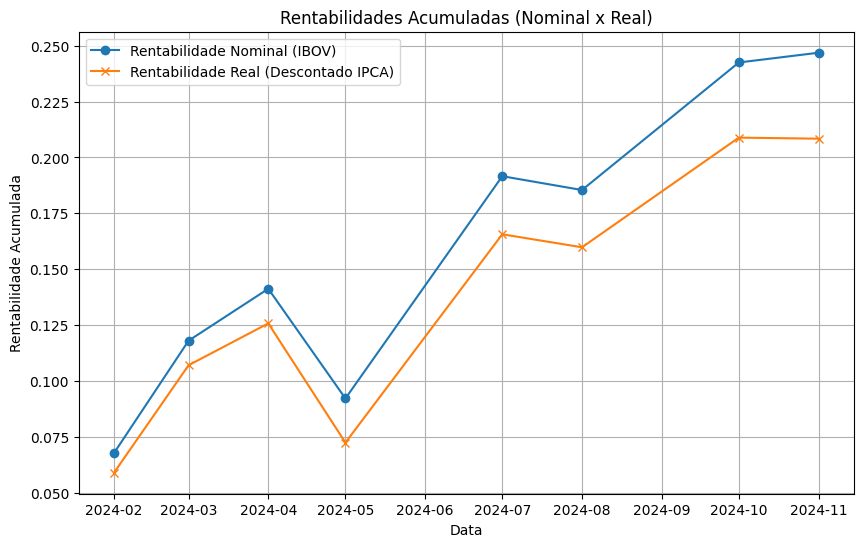

In [103]:
import matplotlib.pyplot as plt

# Configurando o índice como eixo x
df_join_filter_acumulada.index = pd.to_datetime(df_join_filter_acumulada.index)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(df_join_filter_acumulada.index, df_join_filter_acumulada['rentabilidade_ibov'], label='Rentabilidade Nominal (IBOV)', marker='o')
plt.plot(df_join_filter_acumulada.index, df_join_filter_acumulada['rentabilidade_real'], label='Rentabilidade Real (Descontado IPCA)', marker='x')

# Personalizações
plt.title('Rentabilidades Acumuladas (Nominal x Real)')
plt.xlabel('Data')
plt.ylabel('Rentabilidade Acumulada')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
# Calculando as rentabilidades acumuladas
rentabilidade_ibov_acumulada = (1 + df_join['rentabilidade_ibov']).cumprod() - 1
inflacao_acumulada = (1 + df_join['indice']).cumprod() - 1

# Calculando a rentabilidade real total ajustando pelo IPCA
rentabilidade_real_total = (1 + rentabilidade_ibov_acumulada.iloc[-1]) / (1 + inflacao_acumulada.iloc[-1]) - 1

print("Rentabilidade Nominal Total (IBOV):", rentabilidade_ibov_acumulada.iloc[-1])
print("Inflação Total (IPCA):", inflacao_acumulada.iloc[-1])
print("Rentabilidade Real Total:", rentabilidade_real_total)


Rentabilidade Nominal Total (IBOV): 1.3188827381855912
Inflação Total (IPCA): 1464325.6938828132
Rentabilidade Real Total: -0.9999984164170824


In [104]:
import ipeadatapy as ipea
dados_nominais = (
  ipea.timeseries("MTE12_SALMIN12")
  .rename_axis("data", axis = "index")
  .rename(columns = {"VALUE (R$)": "nominal"})
  .filter(items = ["nominal"], axis = "columns")
  .query("data >= '2000-01-01'")
)

In [108]:
dados_nominais

,nominal
data,
2000-01-01,136.0
2000-02-01,136.0
2000-03-01,136.0
2000-04-01,151.0
2000-05-01,151.0
...,...
2024-08-01,1412.0
2024-09-01,1412.0
2024-10-01,1412.0


In [109]:
tabela = dados_nominais.join(other = df_ipca, how = "inner")
tabela


,nominal,indice
data,,
2020-01-01,1039.0,0.21
2020-02-01,1045.0,0.25
2020-03-01,1045.0,0.07
2020-04-01,1045.0,-0.31
2020-05-01,1045.0,-0.38
2020-06-01,1045.0,0.26
2020-07-01,1045.0,0.36
2020-08-01,1045.0,0.24
2020-09-01,1045.0,0.64


In [112]:
indice_data_base = tabela.query("data == data.max()").indice.values
tabela.assign(real = lambda x: (indice_data_base / x.indice) * x.nominal).tail()


,nominal,indice,real
data,,,
2024-07-01,1412.0,0.38,1449.157895
2024-08-01,1412.0,-0.02,-27534.000000
2024-09-01,1412.0,0.44,1251.545455
2024-10-01,1412.0,0.56,983.357143
2024-11-01,1412.0,0.39,1412.000000


In [ ]:
tabela=